## KD-Tree Implementation
* We modifed the sample code from astroML, but we didn't use astroML's library
* source: http://www.astroml.org/book_figures/chapter2/fig_kdtree_example.html

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# find nearest value
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

class KDTree:
    """Simple KD tree class"""

    # class initialization function
    def __init__(self, data, mins, maxs, prev):
        self.data = np.asarray(data)

        # data should be two-dimensional
        #assert self.data.shape[1] == 2

        if mins is None:
            mins = data.min(0)
        if maxs is None:
            maxs = data.max(0)

        self.mins = np.asarray(mins)
        self.maxs = np.asarray(maxs)
        self.sizes = self.maxs - self.mins
        
        self.prev = prev
        self.leaf = False
        
        self.child1 = None
        self.child2 = None

        if len(data) > 0:
            # sort on the dimension with the largest spread
            largest_dim = self.prev
            if self.prev == -1:
                largest_dim = np.argmax(self.sizes)
            else:
                largest_dim = (largest_dim+1)%2
            i_sort = np.argsort(self.data[:, largest_dim])
            self.data[:] = self.data[i_sort, :]
            #print("data: \n", self.data)
            
            # find split point
            N = self.data.shape[0]
            
            if N == 1:
                split_point = self.data[:, largest_dim]
                mins1 = self.mins.copy()
                mins1[largest_dim] = split_point
                maxs2 = self.maxs.copy()
                maxs2[largest_dim] = split_point
                self.leaf = True
                self.child1 = KDTree([], mins1, self.maxs, largest_dim)
                self.child2 = KDTree([], self.mins, maxs2, largest_dim)
                #print("mins1, self.maxs: ", mins1, self.maxs)
                #print("self.mins, maxs2: ", self.mins, maxs2)
                #print("-------")
            else:
                split_point = np.median(self.data[:, largest_dim])
                split_point = find_nearest(self.data[:, largest_dim], split_point+0.1)
                #print("split_point: ", split_point)
                idx = np.where(self.data[:, largest_dim] == split_point)[0][0]
                #print('idx= ', idx)
                
                # create subnodes
                mins1 = self.mins.copy()
                mins1[largest_dim] = split_point
                maxs2 = self.maxs.copy()
                maxs2[largest_dim] = split_point
                #print("mins1, self.maxs: ", mins1, self.maxs)
                #print("self.mins, maxs2: ", self.mins, maxs2)
                #print("-------")
                # Recursively build a KD-tree on each sub-node
                self.child1 = KDTree(self.data[idx+1:], mins1, self.maxs, largest_dim)
                self.child2 = KDTree(self.data[:idx], self.mins, maxs2, largest_dim)

    def draw_rectangle(self, ax, depth=None):
        """Recursively plot a visualization of the KD tree region"""
        if depth <= 1:
            #print('self.mins, *size: ', self.mins,  *self.sizes)
            #print()
            rect = plt.Rectangle(self.mins, *self.sizes, ec='r', fc='none')
            ax.add_patch(rect)
            pass

        if self.child2 is not None:
            if depth is None:
                self.child1.draw_rectangle(ax)
                self.child2.draw_rectangle(ax)
            elif depth > 0:
                self.child1.draw_rectangle(ax, depth - 1)
                self.child2.draw_rectangle(ax, depth - 1)
                
    def depth(self):
        current_depth = 0

        if self.child2:
            current_depth = max(current_depth, self.child2.depth())

        if self.child1:
            current_depth = max(current_depth, self.child1.depth())

        return current_depth + 1

In [2]:
import pandas as pd
head = ['x', 'y']
points = pd.read_csv('points', sep=' ', header=None, names=head).values

In [3]:
# Use our KD Tree class to recursively divide the space
KDT = KDTree(points, [-2, -2], [10, 10], -1)

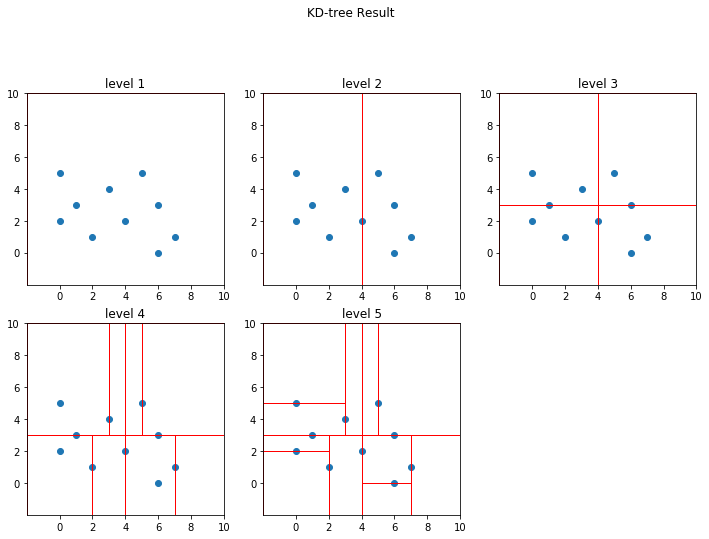

In [4]:
# Plot four different levels of the KD tree
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust()

for level in range(1, KDT.depth()+1):
    ax = fig.add_subplot(3, 3, level, xticks=np.arange(12, step=2), yticks=np.arange(12, step=2))
    ax.scatter(points[:, 0], points[:, 1])
    KDT.draw_rectangle(ax, depth=level - 1)
    ax.set_xlim(-2, 10)
    ax.set_ylim(-2, 10)
    ax.set_title('level %i' % level)

# suptitle() adds a title to the entire figure
fig.suptitle('KD-tree Result')
plt.show()


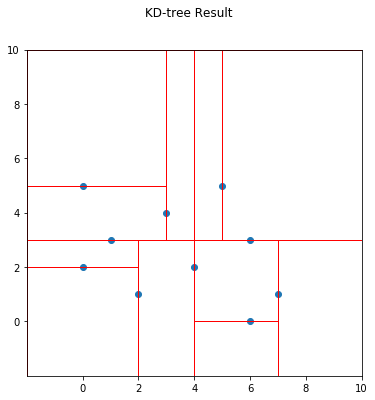

In [5]:
# Final Result
fig = plt.figure(figsize=(6, 6))

for level in range(1, 2):
    ax = fig.add_subplot(1, 1, level, xticks=np.arange(12, step=2), yticks=np.arange(12, step=2))
    ax.scatter(points[:, 0], points[:, 1])
    KDT.draw_rectangle(ax, depth=KDT.depth()-1)
    ax.set_xlim(-2, 10)
    ax.set_ylim(-2, 10)

# suptitle() adds a title to the entire figure
fig.suptitle('KD-tree Result')
plt.show()


## KD-Tree Visualization
* Use another kdtree package
* source: https://github.com/stefankoegl/kdtree

In [6]:
import kdtree
#import pandas as pd
#points = pd.read_csv('points', sep=' ', header=None, names=head).values
tree = kdtree.create(points.tolist())
kdtree.visualize(tree)



                                           [4, 2]                                      

                       [1, 3]                                   [6, 3]                  

             [2, 1]               [3, 4]               [7, 1]               [5, 5]        

        [0, 2]                [0, 5]                [6, 0]                                    

